In [122]:
import numpy as np  # always need it
import matplotlib.pyplot as plt
import ot  # ot
import time

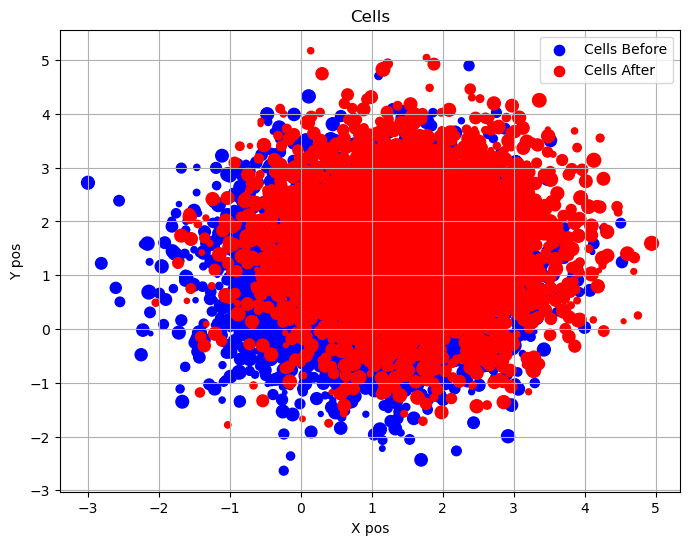

In [123]:
# Number of Cells 
size = 5000

#np.random.seed(0)  # For reproducibility

# Set A, size number of cells centered at 1,1
A = np.random.randn(size, 2) + np.array([1, 1])
# Random integers for the cost leaving point
AP = np.random.randint(10, 100, size=size)

# Set B, size number of cells centered at 1,1, 
# we set the cost coming into the point as the random order of APs, sum(AP) must equal sum(BP)
B = np.random.randn(size, 2) + np.array([1.5, 1.5])
BP = np.random.permutation(AP)

# Graph
plt.figure(figsize=(8, 6))
plt.scatter(A[:, 0], A[:, 1], c='blue', s=AP, label='Cells Before')
plt.scatter(B[:, 0], B[:, 1], c='red', s=BP, label='Cells After')
plt.xlabel('X pos')
plt.ylabel('Y pos')
plt.title('Cells')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

In [124]:
t0_pos = A
t0_probs = AP
t1_pos = B
t1_probs = BP
labels = [str(i) for i in range(len(t0_probs))]

/var/folders/_4/ykqt5y3x1g9g_q8_17d7jbhm0000gn/T/ipykernel_24230/1362074655.py:4: UserWarning: Input histogram consists of integer. The transport plan will be casted accordingly, possibly resulting in a loss of precision. If this behaviour is unwanted, please make sure your input histogram consists of floating point elements.
  ot_emd = ot.emd(t0_probs, t1_probs, C)


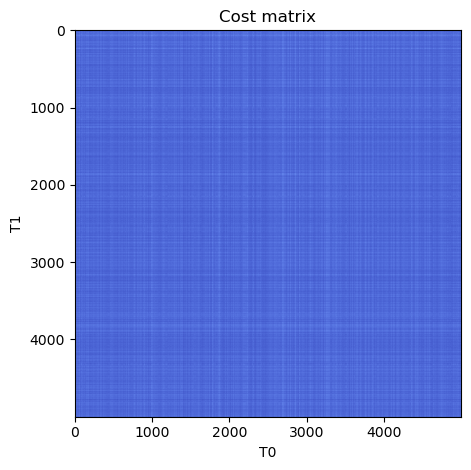

In [125]:
C = ot.dist(t0_pos, t1_pos)

start = time.time()
ot_emd = ot.emd(t0_probs, t1_probs, C)
time_emd = time.time() - start

im = plt.imshow(C, cmap="coolwarm")
plt.title('Cost matrix')


plt.xlabel('T0')
plt.ylabel('T1')
plt.tight_layout()

In [126]:
start = time.time()
ot_emd = ot.emd(t0_probs, t1_probs , C)
time_emd = time.time() - start

/var/folders/_4/ykqt5y3x1g9g_q8_17d7jbhm0000gn/T/ipykernel_24230/454360257.py:2: UserWarning: Input histogram consists of integer. The transport plan will be casted accordingly, possibly resulting in a loss of precision. If this behaviour is unwanted, please make sure your input histogram consists of floating point elements.
  ot_emd = ot.emd(t0_probs, t1_probs , C)


In [127]:
# Compute Sinkhorn transport matrix from algorithm
reg = 0.005
K = np.exp(-C / C.max() / reg)
nit = 100
u = np.ones((len(t0_probs), ))
for i in range(1, nit):
    v = t1_probs / np.dot(K.T, u)
    u = t0_probs / (np.dot(K, v))
ot_sink_algo = np.atleast_2d(u).T * (K * v.T)  # Equivalent to np.dot(np.diag(u), np.dot(K, np.diag(v)))

# Compute Sinkhorn transport matrix with POT
ot_sinkhorn = ot.sinkhorn(t0_probs, t1_probs, reg=reg, M=C / C.max())

# Difference between the 2
print('Difference between algo and ot.sinkhorn = {0:.2g}'.format(np.sum(np.power(ot_sink_algo - ot_sinkhorn, 2))))

Difference between algo and ot.sinkhorn = 1.1e-09


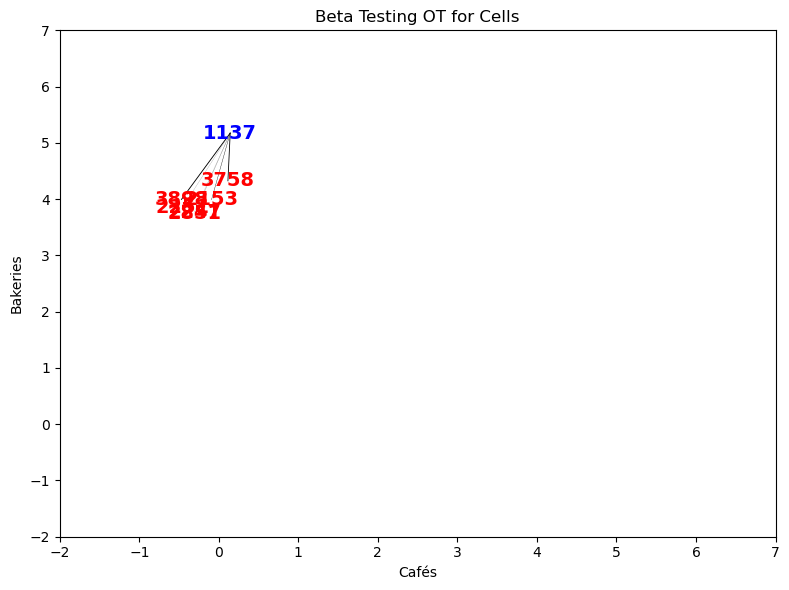

In [130]:
# Plot the matrix and the map
plt.figure(figsize=(8, 6))
# Adjust the axis limits to fit the points
plt.xlim(-2, 7)
plt.ylim(-2, 7)

fcell=1137
lw = 0.01


for i in range(len(t0_pos)):
    if (ot_sinkhorn[i, fcell] / ot_sinkhorn.max() > lw):
        plt.plot([t0_pos[i, 0], t1_pos[fcell, 0]], [t0_pos[i, 1], t1_pos[fcell, 1]],
                    '-k', lw=3. * ot_sinkhorn[i, fcell] / ot_sinkhorn.max())




plt.text(t1_pos[fcell, 0], t1_pos[fcell, 1], labels[fcell], color='b', fontsize=14,
                fontweight='bold', ha='center', va='center')

        
for i in range(len(t0_pos)):
    if (ot_sinkhorn[i, fcell] / ot_sinkhorn.max() > lw):
        plt.text(t0_pos[i, 0], t0_pos[i, 1], labels[i], color='r', fontsize=14,
                fontweight='bold', ha='center', va='center')
plt.title('Beta Testing OT for Cells')




plt.xlabel('Cafés')
plt.ylabel('Bakeries')
plt.tight_layout()

Text(0.5, 1.0, 'Beta Testing OT for Cells')

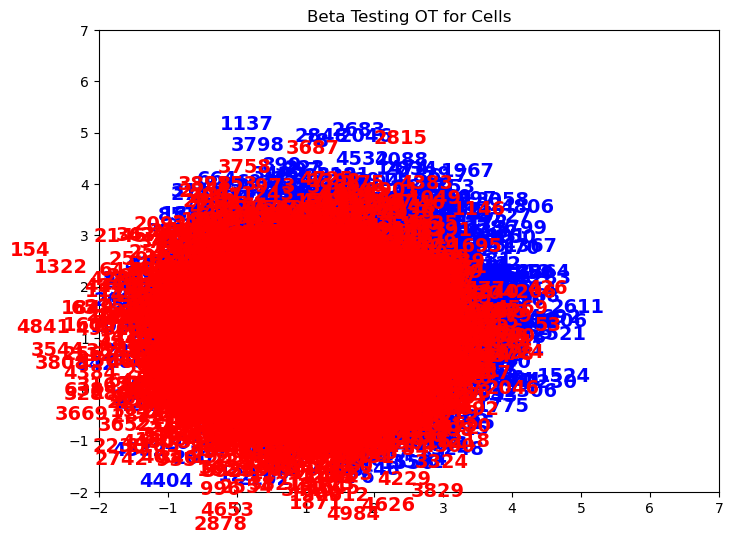

In [129]:
labels = [str(i) for i in range(len(t0_probs))]

plt.figure(figsize=(8, 6))
# Adjust the axis limits to fit the points
plt.xlim(-2, 7)
plt.ylim(-2, 7)


for i in range(len(t1_pos)):
    plt.text(t1_pos[i, 0], t1_pos[i, 1], labels[i], color='b', fontsize=14,
            fontweight='bold', ha='center', va='center')
for i in range(len(t0_pos)):
    plt.text(t0_pos[i, 0], t0_pos[i, 1], labels[i], color='r', fontsize=14,
            fontweight='bold', ha='center', va='center')
plt.title('Beta Testing OT for Cells')

